In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url="../data/processed/sorted_output.csv"
parse_dates=["time"]
ds = pd.read_csv(url, parse_dates=parse_dates)

In [17]:
ds.shape

(6038706, 5)

In [19]:
ds["sensor"].value_counts()

DHT22     1522253
HTU21     1510105
BMP280    1504469
DHT11     1501874
DM280           5
Name: sensor, dtype: int64

In [20]:
ds.sample(10)

,time,sensor,H,P,T
1431850,2018-01-13 10:49:21,DHT22,1.0,NaN,22.20
1848556,2018-01-18 09:17:43,DHT11,33.0,NaN,26.00
3727829,2018-02-10 10:55:18,DHT22,1.0,NaN,22.10
5348436,2018-03-05 14:12:41,DHT11,34.0,NaN,23.00
2549000,2018-01-26 19:25:10,DHT11,35.0,NaN,22.00
4374700,2018-02-18 05:49:07,HTU21,35.4,NaN,21.46
2746945,2018-01-29 04:13:07,DHT22,1.0,NaN,20.50
1327837,2018-01-12 06:22:45,DHT22,1.0,NaN,21.80
4746803,2018-02-26 15:08:52,DHT11,34.0,NaN,21.00
4523761,2018-02-19 23:52:26,HTU21,37.4,NaN,22.23


In [22]:
ds.describe(include="all")

,time,sensor,H,P,T
count,6038706,6038706,4.288839e+06,1.422792e+06,5.711640e+06
unique,5943769,5,NaN,NaN,NaN
top,2018-03-13 11:35:48,DHT22,NaN,NaN,NaN
freq,4,1522253,NaN,NaN,NaN
first,2017-12-19 14:07:18,NaN,NaN,NaN,NaN
last,2018-03-13 11:42:12,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.336465e+01,1.015690e+03,2.201185e+01
std,NaN,NaN,1.617257e+01,1.011069e+01,2.631197e+00
min,NaN,NaN,1.000000e+00,9.856200e+02,1.500000e+01
25%,NaN,NaN,1.000000e+00,1.008670e+03,2.063000e+01


In [3]:
# Analizing only Humidity information
dsh = ds[pd.notnull(ds["H"])]
dsh = dsh[dsh["H"] > 1]
dsh = dsh[dsh["H"]<99.9]
dsh = dsh[dsh["time"]>"2017-12-22"]
dsh = dsh[["time","sensor","H"]]

In [4]:
dsh.shape

(2848495, 3)

In [5]:
dsh["sensor"].value_counts()

HTU21    1428193
DHT11    1420302
Name: sensor, dtype: int64

In [6]:
dsh.sample(10)

,time,sensor,H
1715630,2018-01-16 18:36:57,DHT11,34.0
5911615,2018-03-12 00:26:17,HTU21,34.2
5329356,2018-03-05 08:59:06,HTU21,32.0
1767375,2018-01-17 09:30:03,HTU21,32.6
2385017,2018-01-24 19:45:44,DHT11,34.0
5153865,2018-03-03 08:17:24,DHT11,35.0
3921831,2018-02-12 17:02:49,DHT11,34.0
5755864,2018-03-10 05:55:51,HTU21,37.8
3250729,2018-02-05 00:14:02,DHT11,36.0
391209,2017-12-26 19:33:49,DHT11,37.0


In [7]:
dsh.describe(include="all")

,time,sensor,H
count,2848495,2848495,2.848495e+06
unique,2848493,2,NaN
top,2018-02-21 08:14:06,HTU21,NaN
freq,2,1428193,NaN
first,2017-12-22 08:12:42,NaN,NaN
last,2018-03-13 11:42:12,NaN,NaN
mean,NaN,NaN,3.467088e+01
std,NaN,NaN,3.619587e+00
min,NaN,NaN,1.970000e+01
25%,NaN,NaN,3.370000e+01


In [8]:
dsh1 = dsh[dsh["sensor"]=="HTU21"]

In [9]:
dsh1.describe(include="all")

,time,sensor,H
count,1428193,1428193,1.428193e+06
unique,1428193,1,NaN
top,2018-01-18 04:08:41,HTU21,NaN
freq,1,1428193,NaN
first,2017-12-22 08:12:42,NaN,NaN
last,2018-03-13 11:42:12,NaN,NaN
mean,NaN,NaN,3.434112e+01
std,NaN,NaN,4.953964e+00
min,NaN,NaN,1.970000e+01
25%,NaN,NaN,3.040000e+01


In [12]:
dsh2 = dsh[dsh["sensor"]=="DHT11"]

In [13]:
dsh2.describe(include="all")

,time,sensor,H
count,1420302,1420302,1.420302e+06
unique,1420302,1,NaN
top,2018-03-10 00:35:58,DHT11,NaN
freq,1,1420302,NaN
first,2017-12-22 11:22:11,NaN,NaN
last,2018-03-13 11:42:09,NaN,NaN
mean,NaN,NaN,3.500247e+01
std,NaN,NaN,1.173970e+00
min,NaN,NaN,3.100000e+01
25%,NaN,NaN,3.400000e+01


In [15]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

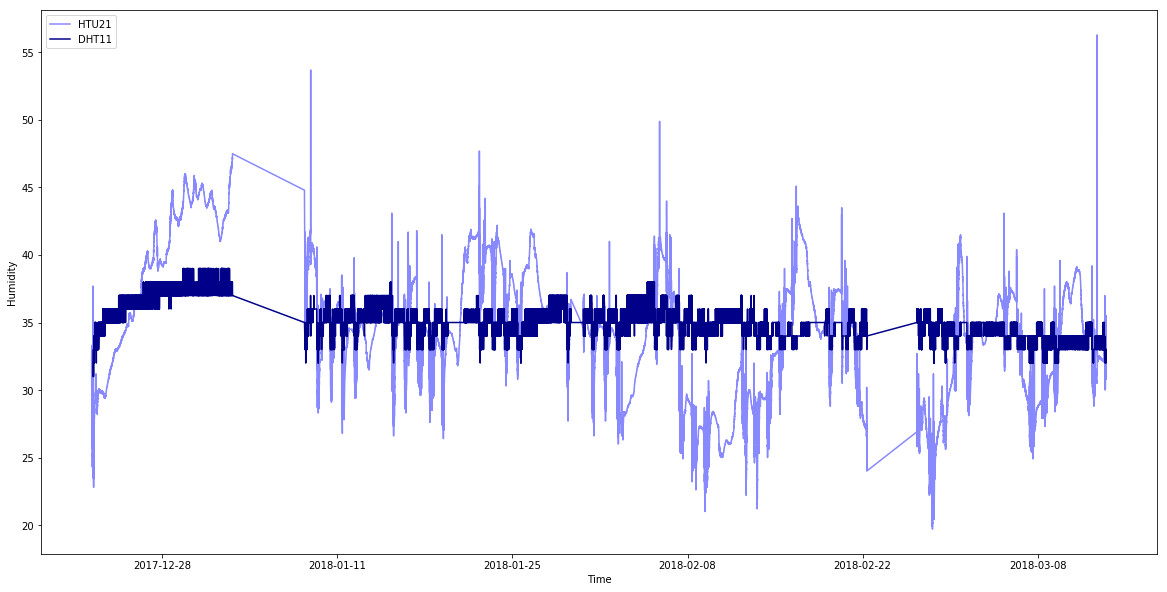

In [16]:
plt.plot(dsh1["time"], dsh1["H"], "#8888ff", label="HTU21")
plt.plot(dsh2["time"], dsh2["H"], "#000088", label="DHT11")
plt.xlabel("Time")
plt.ylabel("Humidity")
plt.legend()